IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import our dataset
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
data.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# renaming column names into meaningful names
data = data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})

In [6]:
# removing unnecessary column
data.drop(['Unnamed: 0'],axis = 1,inplace=True)
data.head()

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [24]:
#checking the total rows and total columns
data.shape

(16468, 13)

In [25]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU_4046', 'PLU_4225',
       'PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

In [26]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
PLU_4046        float64
PLU_4225        float64
PLU_4770        float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [30]:
data.describe()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Columbus'),
  Text(10, 0, 'DallasFtWorth'),
  Text(11, 0, 'Denver'),
  Text(12, 0, 'Detroit'),
  Text(13, 0, 'GrandRapids'),
  Text(14, 0, 'GreatLakes'),
  Text(15, 0, 'HarrisburgScranton'),
  Text(16, 0, 'HartfordSpringfield'),
  Text(17, 0, 'Houston'),
  Text(18, 0, 'Indianapolis'),
  Text(19, 0, 'Jacksonville'),
  Text(20, 0, 'LasVegas'),
  Text(21, 0, 'LosAngeles'),
  Text(22, 0, 'Louisville'),
  Text(23, 0, 'MiamiFtLauderdale'),
  Text(24, 0, 'Midsouth'),
  Text(25, 0, 'Nashville'),
  Text(26, 0, 'N

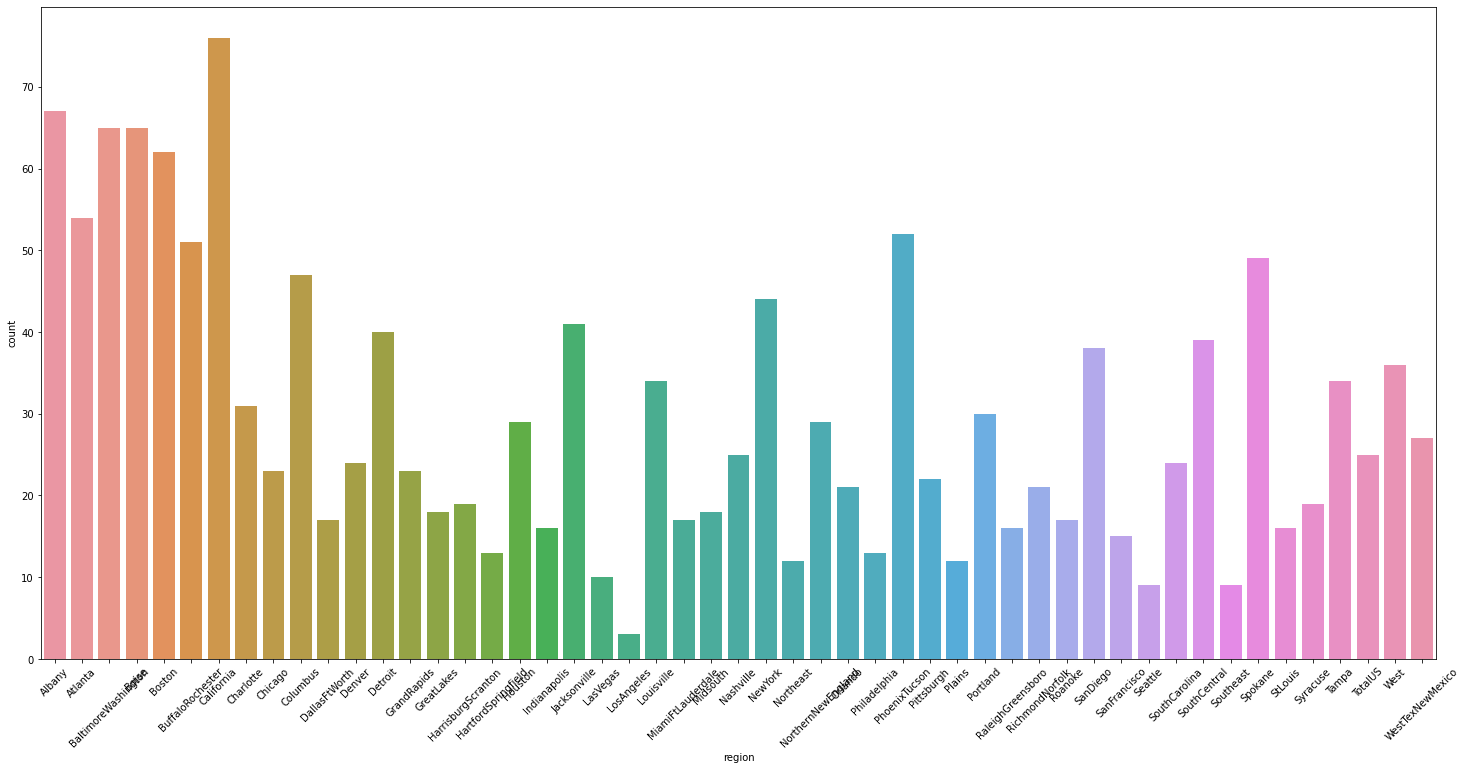

In [8]:
# Bar Chart to indicate the number of regions 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = data)
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, '2015.0'), Text(1, 0, '2016.0')])

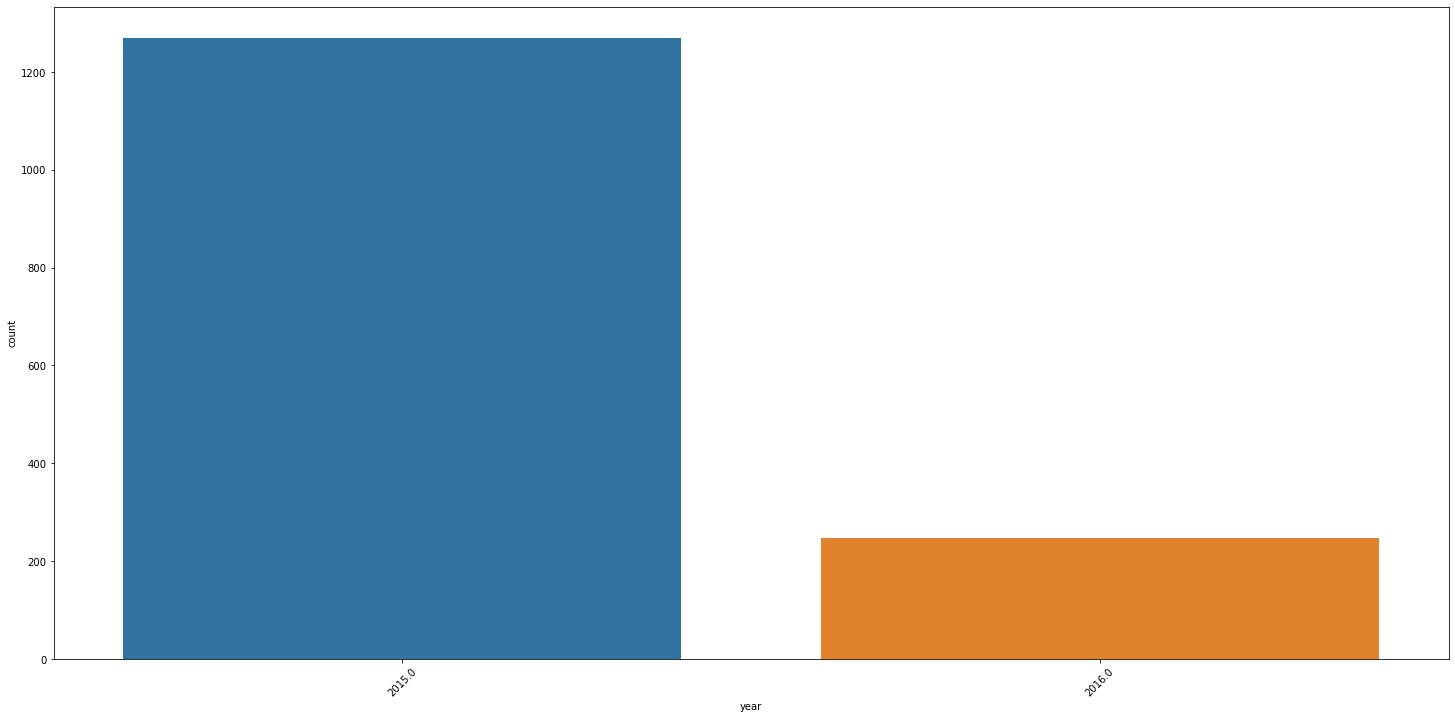

In [9]:
# Bar Chart to indicate the year
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = data)
plt.xticks(rotation = 45)

In [10]:
avocado_prophet_df = data[['Date', 'AveragePrice']]

In [11]:
avocado_prophet_df

,Date,AveragePrice
0,27-12-2015,1.33
1,20-12-2015,1.35
2,13-12-2015,0.93
3,06-12-2015,1.08
4,29-11-2015,1.28
...,...,...
16463,NaN,NaN
16464,NaN,NaN
16465,NaN,NaN
16466,NaN,NaN


Distribution and Correlations of variables AveragePrice,Total Volumn

In [12]:
#sns.set_style('darkgrid')
%matplotlib inline

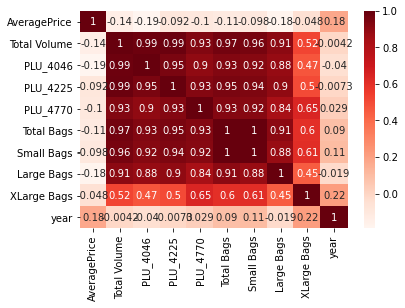

In [14]:
cor=data.corr()
sns.heatmap(cor, annot=True, cmap= plt.cm.Reds)
plt.show()

Average Price Distribution

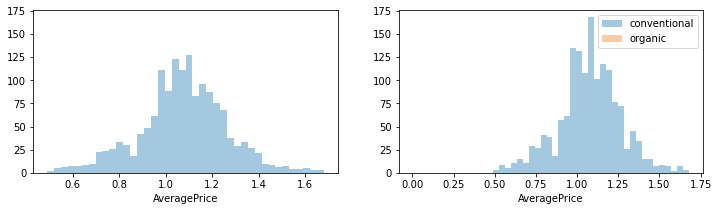

In [18]:
x2_a=data[data['type']=='conventional'].AveragePrice
x2_b=data[data['type']=='organic'].AveragePrice

plt.figure(figsize=[12,3])

plt.subplot(1,2,1)
x=data.AveragePrice
ax1= sns.distplot(x,bins=40,kde=False)

plt.subplot(1,2,2,sharey=ax1)
ax2= sns.distplot(x2_a,label='conventional',kde=False)
ax3= sns.distplot(x2_b,label='organic',kde=False)
plt.legend()
plt.show()


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

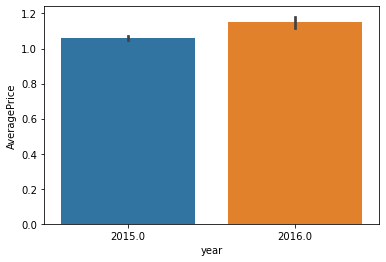

In [31]:
sns.barplot(x = "year", y = "AveragePrice", data = data)

In [34]:
data.skew()

AveragePrice   -0.109444
Total Volume    6.200138
PLU_4046        6.051830
PLU_4225        6.394926
PLU_4770        5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

[]

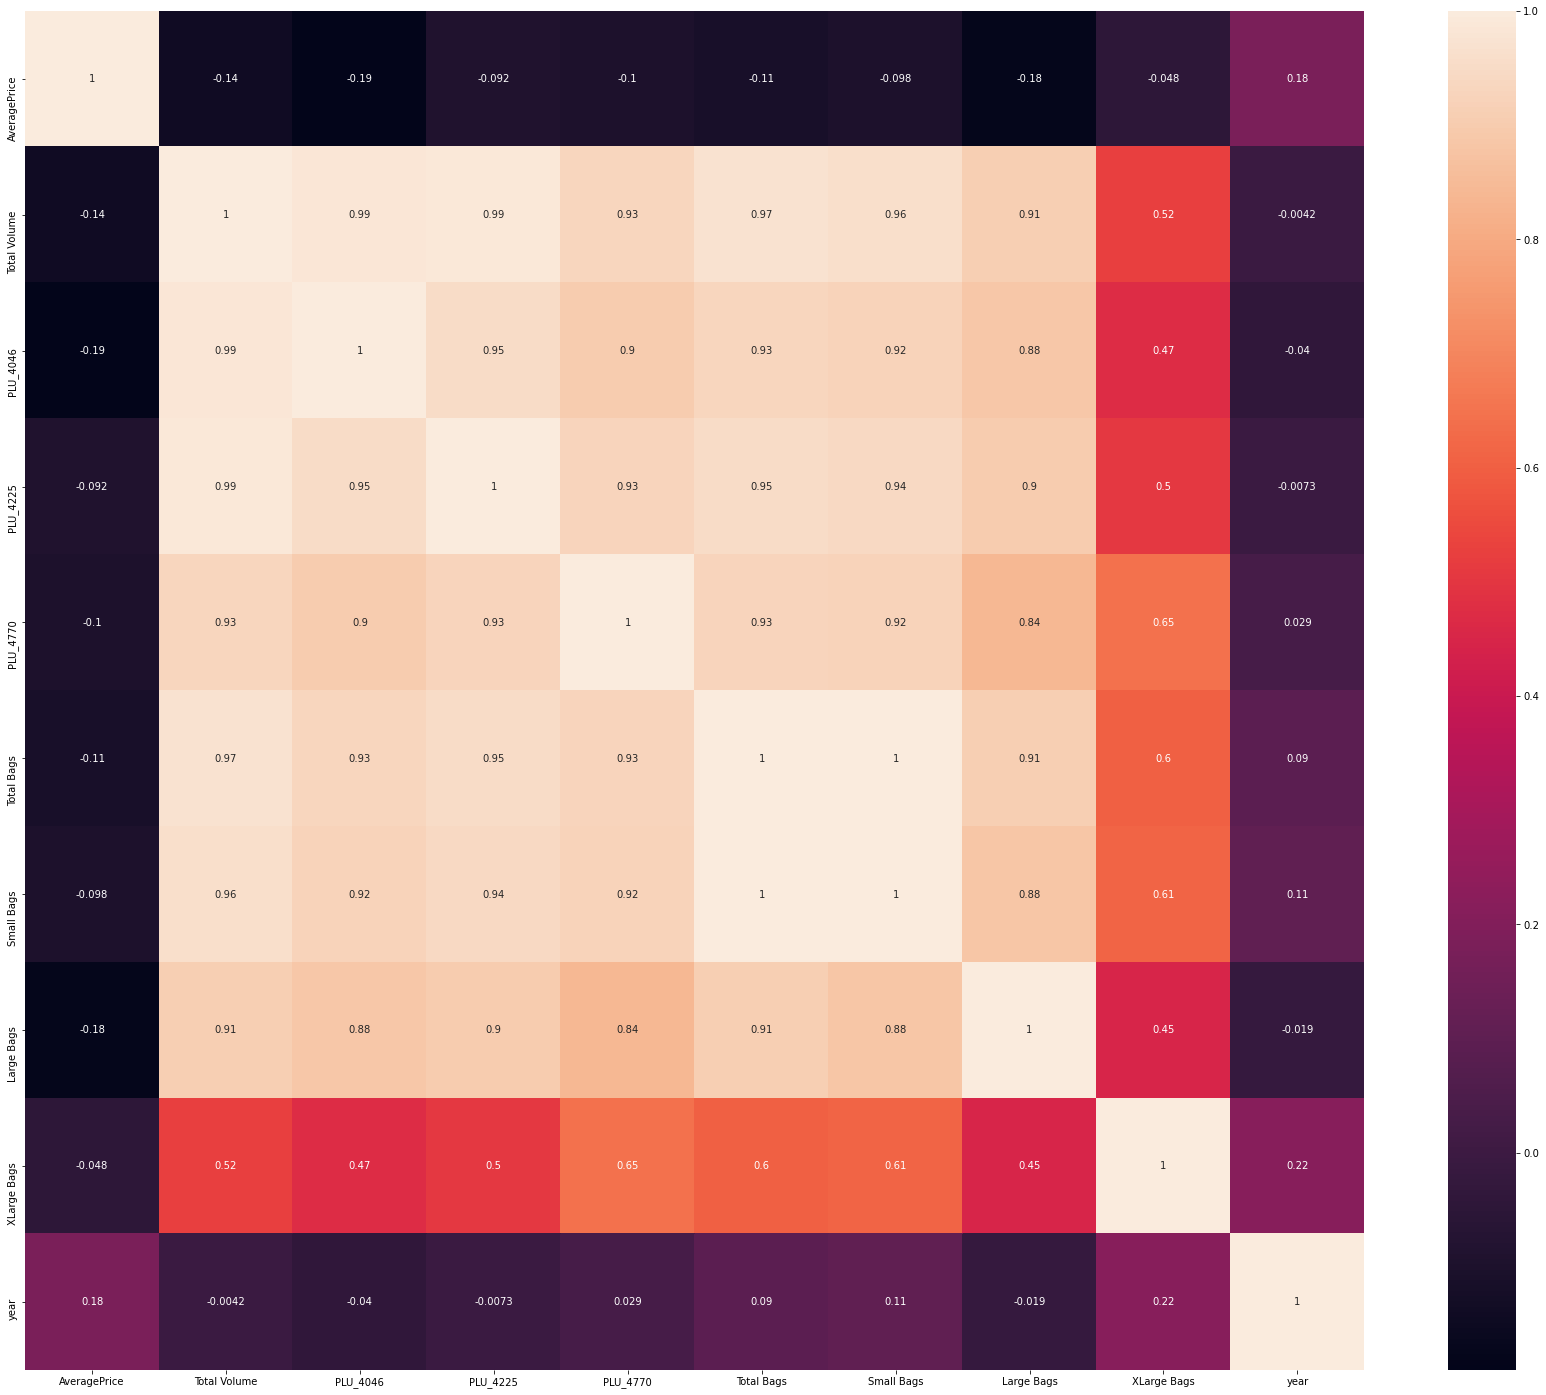

In [38]:
## checking the correaltion of all column
data_cor = data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(data_cor,annot=True)
plt.plot()